## Module 4 Homework

In [1]:
# Dependencies and Setup
import pandas as pd
import pathlib

# File to Load 
working_dir = pathlib.Path.cwd()
school_data_to_load = working_dir / "Resources/schools_complete.csv"
student_data_to_load = working_dir / "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

school_data_complete.head(10)


,Student ID,student_name,gender,year,school_name,reading_score,maths_score,School ID,type,size,budget
0,0,Paul Bradley,M,9,Huang High School,96,94,0,Government,2917,1910635
1,1,Victor Smith,M,12,Huang High School,90,43,0,Government,2917,1910635
2,2,Kevin Rodriguez,M,12,Huang High School,41,76,0,Government,2917,1910635
3,3,Richard Scott,M,12,Huang High School,89,86,0,Government,2917,1910635
4,4,Bonnie Ray,F,9,Huang High School,87,69,0,Government,2917,1910635
5,5,Bryan Miranda,M,9,Huang High School,88,93,0,Government,2917,1910635
6,6,Sheena Carter,F,11,Huang High School,73,60,0,Government,2917,1910635
7,7,Nicole Baker,F,12,Huang High School,69,64,0,Government,2917,1910635
8,8,Michael Roth,M,10,Huang High School,94,66,0,Government,2917,1910635
9,9,Matthew Greene,M,10,Huang High School,64,77,0,Government,2917,1910635


## Local Government Area Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average maths score 

* Calculate the average reading score

* Calculate the percentage of students with a passing maths score (50 or greater)

* Calculate the percentage of students with a passing reading score (50 or greater)

* Calculate the percentage of students who passed maths **and** reading (% Overall Passing)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [2]:
total_schools = school_data["school_name"].count()
total_students = school_data["size"].sum()
total_budget = school_data["budget"].sum()
avg_maths = school_data_complete["maths_score"].mean()
avg_reading = school_data_complete["reading_score"].mean()

# calculate the pass scores for the students

def passed_test(dataframe, test_types, pass_score, total_num_students):
    """
    Calculate the percentage of students that have passed an exam type/s
    Inputs:
    dataframe = pandas Dataframe with student data
    test_types = Type List with string elements describing test to pass e.g. ["maths"] or ["maths", "reading"]
    pass_score = float/integer: the pass score
    total_num_students = integer: the total number of students
    
    Output:
    Type Float: The percentage of students who have passed the exam type/s
    """
    
    # create list of column header names for dataframe
    column_headers = [f"{test_type}_score" for test_type in test_types]
    
    # test whether columns for test are in dataframe
    try:
        [dataframe[header] for header in column_headers]
    except KeyError:
        print("Test types not found in dataframe")
    
    # create list of conditions for passing tests
    conditions = [f"(dataframe['{header}'] >= pass_score)" for header in column_headers]
    
    # create final statements to run from conditions
    if len(conditions) == 1:
        statement = conditions[0]
    else:
        statement = " & ".join(conditions)
    final_statement = f"({statement}).sum() / total_students * 100"
    
    # evaluate the final statement and return it's value
    return eval(final_statement)
    
    
pass_score = 50

# calculate the percentage of students that passed maths
perc_pass_math = passed_test(school_data_complete, ["maths"], pass_score, total_students)

# calculate the percentage of students that passed reading
perc_pass_reading = passed_test(school_data_complete, ["reading"], pass_score, total_students)

# calculate the percentage of students that passed both reading and maths
perc_overall_pass = passed_test(school_data_complete, ["reading", "maths"], pass_score, total_students)


# create a dictionary that stores all the relevent data
loc_gov_summary = {
    "Total Schools": [total_schools],
    "Total Students": [total_students],
    "Total Budget": [total_budget],
    "Average Maths Score": [avg_maths],
    "Average Reading Score": [avg_reading],
    "% Passing Maths": [perc_pass_math],
    "% Passing Reading": [perc_pass_reading],
    "% Overall Passing": [perc_overall_pass],
}

# creating summary dataframe 
area_summary = pd.DataFrame(loc_gov_summary)

# dataframe formatting tips https://towardsdatascience.com/apply-thousand-separator-and-other-formatting-to-pandas-dataframe-45f2f4c7ab01
def format_column_with_thousand_commas(df, column_header):
    """
    Adds commas for thousands in numbers for a specified column in a given dataframe

    Input: 
    df = Type dataframe object to format
    column_header = Type String: column header to format
    """
    df.loc[:, column_header] = df[column_header].map('{:,.0f}'.format)

def format_column_with_dollars_and_commas(df, column_header):
    """
    Adds commas for thousands in numbers with dollar sign for a specified column in a given dataframe

    Input: 
    df =Type Dataframe object to format
    column_header = Type String: column header to format
    """
    df.loc[:, column_header] = "$" + df[column_header].map('{:,.2f}'.format)


# format selected columns
format_column_with_thousand_commas(area_summary, "Total Students")
format_column_with_dollars_and_commas(area_summary, "Total Budget")


area_summary

,Total Schools,Total Students,Total Budget,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",70.338192,69.980138,86.078632,84.426857,72.808272


## School Summary

* Create an overview table that summarises key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Maths Score
  * Average Reading Score
  * % Passing Maths
  * % Passing Reading
  * % Overall Passing (The percentage of students that passed maths **and** reading.)
  
* Create a dataframe to hold the above results

In [3]:
# copy the school data from the load screens
df_school_dat = school_data.copy()
df_student_dat = student_data.copy()

def merge_datasets(dataset_1, dataset_2, merge_on):
    """
    This allows the merging of dataset_1 and dataset_2 based on a common column name merge_on
    Input:
    dataset_1 = Type Pandas Dataframe or Series object
    dataset_2 = Type Pandas Dataframe or Series object
    merge_on = Type String: common column name between dataset_1 and dataset_2
    
    Output:
    dataset_3: Type Pandas Dataframe with merged contents
    
    """
    merged_dataset = pd.merge(dataset_1, dataset_2, how="left", on=[merge_on, merge_on])
    return merged_dataset


# calculate the budget per student per school
df_school_dat["Per Student Budget"] = df_school_dat["budget"] / df_school_dat["size"]

# calculate the average maths score per school
avg_maths_school = school_data_complete.groupby("school_name")["maths_score"].mean().rename("Average Maths Score")
df_school_dat = merge_datasets(df_school_dat, avg_maths_school, "school_name")

# calculate the average reading score per school
avg_reading_school = school_data_complete.groupby("school_name")["reading_score"].mean().rename("Average Reading Score")
df_school_dat = merge_datasets(df_school_dat, avg_reading_school, "school_name")

# calculate the percentage of students passing maths per school
df_student_dat["Passed Maths"] = df_student_dat["maths_score"] >= 50
num_students_pass_maths = df_student_dat.groupby("school_name")["Passed Maths"].sum()
df_school_dat = merge_datasets(df_school_dat, num_students_pass_maths, "school_name")
df_school_dat["Perc pass maths"] = df_school_dat["Passed Maths"] / df_school_dat["size"] * 100

# calculate the percentage of students passing reading per school
df_student_dat["Passed Reading"] = df_student_dat["reading_score"] >= 50
num_students_pass_reading = df_student_dat.groupby("school_name")["Passed Reading"].sum()
df_school_dat = merge_datasets(df_school_dat, num_students_pass_reading, "school_name")
df_school_dat["Perc pass reading"] = df_school_dat["Passed Reading"] / df_school_dat["size"] * 100

# calculate the percentage of students that have an overall pass mark per school
df_student_dat["Overall Pass"] = (df_student_dat["reading_score"] >= 50) & \
                                (df_student_dat["maths_score"] >= 50)
num_students_overall_pass = df_student_dat.groupby("school_name")["Overall Pass"].sum()
df_school_dat = merge_datasets(df_school_dat, num_students_overall_pass, "school_name")
df_school_dat["Perc overall pass"] = df_school_dat["Overall Pass"] / df_school_dat["size"] * 100

# extract the per_school_summary with relevant columns from df_school_dat
per_school_summary = df_school_dat[["school_name", 
                                "type", 
                                "size", 
                                "budget", 
                                "Per Student Budget", 
                                "Average Maths Score",
                                "Average Reading Score",
                                "Perc pass maths",
                                "Perc pass reading",
                                "Perc overall pass"]]

# rename columns to more readable
per_school_summary = per_school_summary.rename(columns={
        "school_name": "",
        "type": "School Type",
        "size": "Total Students",
        "budget": "Total School Budget",
        "Perc pass maths": "% Passing Maths",
        "Perc pass reading": "% Passing Reading",
        "Perc overall pass": "% Overall Passing"
    }, errors="raise")

# sort dataframe by school name
per_school_summary = per_school_summary.set_index("").sort_index()

# fromat specfic columns
format_column_with_dollars_and_commas(per_school_summary, "Total School Budget")
format_column_with_dollars_and_commas(per_school_summary, "Per Student Budget")

per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
,,,,,,,,,
Bailey High School,Government,4976,"$3,124,928.00",$628.00,72.352894,71.008842,91.639871,87.379421,80.084405
Cabrera High School,Independent,1858,"$1,081,356.00",$582.00,71.657158,71.359526,90.850377,89.074273,80.785791
Figueroa High School,Government,2949,"$1,884,411.00",$639.00,68.698542,69.077993,81.654798,82.807731,67.650051
Ford High School,Government,2739,"$1,763,916.00",$644.00,69.091274,69.572472,82.438846,82.219788,67.469880
Griffin High School,Independent,1468,"$917,500.00",$625.00,71.788147,71.245232,91.212534,88.487738,81.335150
Hernandez High School,Government,4635,"$3,022,020.00",$652.00,68.874865,69.186408,80.949299,81.877023,66.364617
Holden High School,Independent,427,"$248,087.00",$581.00,72.583138,71.660422,89.929742,88.524590,78.922717
Huang High School,Government,2917,"$1,910,635.00",$655.00,68.935207,68.910525,81.693521,81.453548,66.712376
Johnson High School,Government,4761,"$3,094,650.00",$650.00,68.843100,69.039277,82.062592,81.978576,67.191766


## Top Performing Schools (By % Overall Passing)

* Sort and display the top five performing schools by % overall passing.

In [4]:
# sort the select the top 5 performing schools
top_schools = per_school_summary.sort_values("% Overall Passing", ascending=False).iloc[0:5]
top_schools

,School Type,Total Students,Total School Budget,Per Student Budget,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
,,,,,,,,,
Griffin High School,Independent,1468,"$917,500.00",$625.00,71.788147,71.245232,91.212534,88.487738,81.335150
Cabrera High School,Independent,1858,"$1,081,356.00",$582.00,71.657158,71.359526,90.850377,89.074273,80.785791
Bailey High School,Government,4976,"$3,124,928.00",$628.00,72.352894,71.008842,91.639871,87.379421,80.084405
Wright High School,Independent,1800,"$1,049,400.00",$583.00,72.047222,70.969444,91.777778,86.666667,79.722222
Rodriguez High School,Government,3999,"$2,547,363.00",$637.00,72.047762,70.935984,90.797699,87.396849,79.419855


## Bottom Performing Schools (By % Overall Passing)

* Sort and display the five worst-performing schools by % overall passing.

In [5]:
# sort the select the bottom 5 performing schools
bottom_schools = per_school_summary.sort_values("% Overall Passing", ascending=True).iloc[0:5]
bottom_schools

,School Type,Total Students,Total School Budget,Per Student Budget,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
,,,,,,,,,
Hernandez High School,Government,4635,"$3,022,020.00",$652.00,68.874865,69.186408,80.949299,81.877023,66.364617
Huang High School,Government,2917,"$1,910,635.00",$655.00,68.935207,68.910525,81.693521,81.453548,66.712376
Johnson High School,Government,4761,"$3,094,650.00",$650.00,68.843100,69.039277,82.062592,81.978576,67.191766
Wilson High School,Independent,2283,"$1,319,574.00",$578.00,69.170828,68.876916,82.785808,81.296540,67.455103
Ford High School,Government,2739,"$1,763,916.00",$644.00,69.091274,69.572472,82.438846,82.219788,67.469880


## Maths Scores by Year

* Create a table that lists the average maths score for students of each year level (9, 10, 11, 12) at each school.

  * Create a pandas series for each year. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

<Axes: xlabel='school_name'>

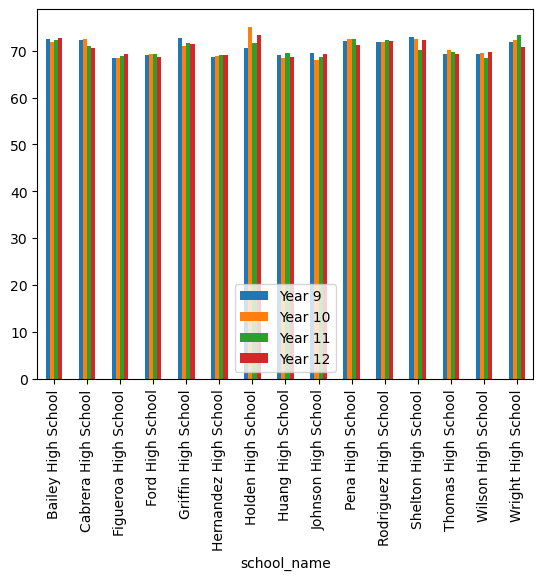

In [18]:
# create a function to calculate the average school mark for a subject

def calculate_avg_school_results_by_year(df, year, subject):
    """
    Calculates and outputs the average mark of a given subject per school for a given grade level

    Input:
    df = Dataframe to calculate on
    year = Integer - the grade year to calculate the marks with
    subject = String - the subject to calcuate the average marks with. e.g. "maths" or "reading"

    Ouput:
    Pandas Series: Average mark per school for the given subject
    """
    # filter df by student year
    students_by_year = df[df["year"] == year]

    # group by school_name and find the average
    avg_student_mark_by_year = students_by_year.groupby("school_name")[f"{subject}_score"].mean()

    # rename the output column with the student Year
    avg_student_mark_by_year.rename(f"Year {year}", inplace=True)
    
    return avg_student_mark_by_year


start_year = 9
end_year = 12

# list comprehension to calculate and store the average school marks for a maths
avg_maths_by_year_and_school = [calculate_avg_school_results_by_year(school_data_complete, year, "maths")\
                                    for year in range(start_year, end_year + 1)]

#create dataframe object with calculated average school marks
maths_scores_by_year = pd.concat(avg_maths_by_year_and_school, axis=1)

maths_scores_by_year.plot.bar()

## Reading Score by Year

* Perform the same operations as above for reading scores

<Axes: xlabel='school_name'>

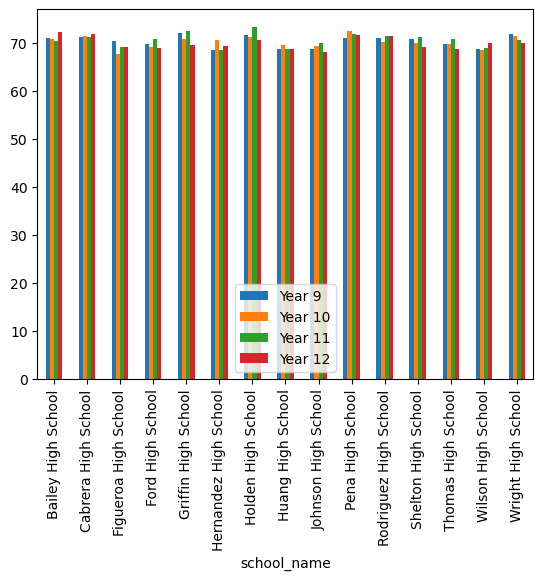

In [17]:
start_year = 9
end_year = 12

# list comprehension to calculate and store the average school marks for a maths
avg_reading_by_year_and_school = [calculate_avg_school_results_by_year(school_data_complete, year, "reading") \
                                    for year in range(start_year, end_year + 1)]

#create dataframe object with calculated average school marks
reading_scores_by_year = pd.concat(avg_reading_by_year_and_school, axis=1)

reading_scores_by_year.plot.bar()

## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Maths Score
  * Average Reading Score
  * % Passing Maths
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

<Axes: xlabel='Spending Ranges (Per Student)'>

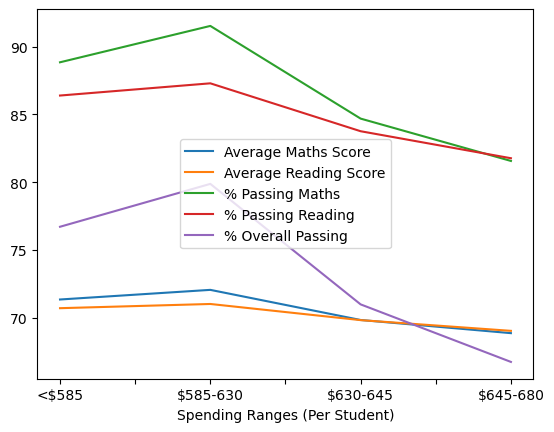

In [21]:
def bin_school_data(df, column_to_bin, bins, bin_labels, binned_column_name):
    """
    Groups the indicated column in a Dataframe into bins with defined bin labels. It also names the bin column.
    
    Input:
    df = Dataframe
    
    """
    df[binned_column_name] = pd.cut(df[column_to_bin], bins=bins, labels=bin_labels, include_lowest=True)
    df = df.groupby(binned_column_name).mean()
    df.drop([column_to_bin], axis="columns", inplace=True)
    return df.round(2)
    

# select relevent columns from the per_school_summary df
spending_summary = per_school_summary.loc[:, ("Per Student Budget", 
                                              "Average Maths Score", 
                                              "Average Reading Score", 
                                              "% Passing Maths", 
                                              "% Passing Reading", 
                                              "% Overall Passing"
                                             )]

# remove the "$" symbol from the "Per Student Budget" column and convert the string to float
spending_summary.loc[:, "Per Student Budget"] = spending_summary["Per Student Budget"].str.replace("$", "").astype("float64")

# setup bins and labels
school_spending_bins = [0, 585.0, 630.0, 645.0, 680.0]
bin_labels = ["<$585", "$585-630", "$630-645", "$645-680"]

spending_summary = bin_school_data(spending_summary, 
                                   column_to_bin="Per Student Budget",
                                   bins=school_spending_bins, 
                                   bin_labels=bin_labels, 
                                   binned_column_name = "Spending Ranges (Per Student)"
                                  )
spending_summary.plot.line()

## Scores by School Size

* Perform the same operations as above, based on school size.

<Axes: xlabel='School Size'>

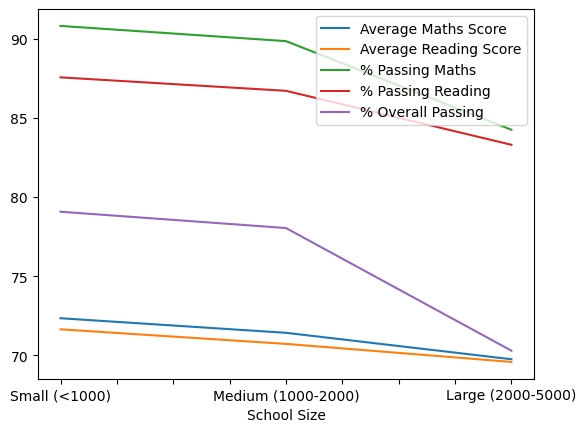

In [22]:
# select relevent columns from the per_school_summary df
size_summary = per_school_summary.loc[:, ("Total Students", 
                                           "Average Maths Score", 
                                          "Average Reading Score", 
                                          "% Passing Maths", 
                                          "% Passing Reading", 
                                          "% Overall Passing"
                                         )]
# setup bins and labels
school_size_bins = [0, 1000, 2000, 5000]
bin_labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

size_summary = bin_school_data(size_summary,
                                column_to_bin="Total Students",
                                bins=school_size_bins, 
                                bin_labels=bin_labels, 
                                binned_column_name = "School Size"
                                )
size_summary.plot.line()

## Scores by School Type

* Perform the same operations as above, based on school type

In [25]:
# select relevent columns from the per_school_summary df
type_summary = per_school_summary.loc[:, ("School Type", 
                                          "Average Maths Score", 
                                          "Average Reading Score", 
                                          "% Passing Maths", 
                                          "% Passing Reading", 
                                          "% Overall Passing"
                                         )]

# group by dataframe by School Type
type_summary = type_summary.groupby("School Type").mean().round(2)
type_summary

,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
School Type,,,,,
Government,69.83,69.68,84.46,83.59,70.70
Independent,71.37,70.72,89.20,86.25,76.97
